# Analysis of the share Maruti Suzuki India Ltd

#### We start by importing some of the important libraries which we will be using in our Exploratory Data Analytics (EDA)

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error

#### Next we load our data which is in a CSV into a pandas DataFrame

In [141]:
pf = pd.read_csv("./archive/MARUTI.csv")
pf

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.00,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.00,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.60,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.60,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.30,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,2021-04-26,MARUTI,EQ,6676.10,6690.20,6789.00,6600.00,6645.00,6638.90,6678.34,937344,6.259903e+14,74474.0,464999.0,0.4961
4423,2021-04-27,MARUTI,EQ,6638.90,6669.95,6709.00,6542.00,6552.00,6568.75,6620.68,1610651,1.066360e+15,130986.0,588617.0,0.3655
4424,2021-04-28,MARUTI,EQ,6568.75,6568.75,6650.00,6545.00,6581.00,6573.80,6598.62,1406270,9.279437e+14,117843.0,672435.0,0.4782
4425,2021-04-29,MARUTI,EQ,6573.80,6635.00,6647.45,6552.00,6562.00,6565.65,6580.77,757075,4.982135e+14,64393.0,352987.0,0.4663


#### We now view the list of all the columns which are available

In [142]:
pf.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

#### Next we find the list of columns which have NaN or null values

In [143]:
na_cols = pf.columns[pf.isna().any()].tolist()
na_cols

['Trades', 'Deliverable Volume', '%Deliverble']

#### We then check as to what percentage of the columns contain NaN values

In [144]:
for col in na_cols:
    null_columns = pf[col].isnull().sum()
    null_percentage = (null_columns * 100) / pf[col].shape[0]
    print("for column ",col,
          " total rows = ",pf[col].shape[0], 
          " ; empty rows = ",null_columns,
          " ; null percent : ",null_percentage)

for column  Trades  total rows =  4427  ; empty rows =  1971  ; null percent :  44.52224983058505
for column  Deliverable Volume  total rows =  4427  ; empty rows =  1  ; null percent :  0.0225886604924328
for column  %Deliverble  total rows =  4427  ; empty rows =  1  ; null percent :  0.0225886604924328


#### From the above analysis :

* Out of **4427** entries for the Trades column, **1971** entries are missing, i.e. **44.5%** of the data is missing
* Out of **4427** entries for the Deliverable Volume, **1** entries are missing, i.e. **0.0225%** of the data is missing
* Out of **4427** entries for the %Deliverables column, **1** entries are missing, i.e. **0.0225%** of the data is missing

#### Therefore, we can :
* Remove the entire column for Trades as a little less than half the data is missing
* Remove the null entries for Deliverable Volume and %Deliverables

In [145]:
pf = pf.drop("Trades", axis=1)
pf = pf.dropna()
pf.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

#### We now have 0 columns and rows with any missing data. This can be verified by checking that the number of rows has fallen by 1 and the columns 'Trades' is no longer present.

In [146]:
pf

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.00,164.30,165.95,35164283,5.835528e+14,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.00,167.00,166.74,10464179,1.744820e+14,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.60,173.35,172.45,11740117,2.024622e+14,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.60,177.95,177.91,5982324,1.064313e+14,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.30,176.20,176.88,6173689,1.092001e+14,1307694.0,0.2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,2021-04-26,MARUTI,EQ,6676.10,6690.20,6789.00,6600.00,6645.00,6638.90,6678.34,937344,6.259903e+14,464999.0,0.4961
4423,2021-04-27,MARUTI,EQ,6638.90,6669.95,6709.00,6542.00,6552.00,6568.75,6620.68,1610651,1.066360e+15,588617.0,0.3655
4424,2021-04-28,MARUTI,EQ,6568.75,6568.75,6650.00,6545.00,6581.00,6573.80,6598.62,1406270,9.279437e+14,672435.0,0.4782
4425,2021-04-29,MARUTI,EQ,6573.80,6635.00,6647.45,6552.00,6562.00,6565.65,6580.77,757075,4.982135e+14,352987.0,0.4663


#### Let us now check for numeric and the non-numeric columns and find how many unique values we can identify. Let us also convert the non-numeric values to numeric values where relevant.

In [147]:
for column in pf.columns:
    if pf[column].dtype == "object":
        print("Unique values in ",column," : ",pf[column].unique())
    else:
        if pf[column].dtype == "str":
            print("String column : ",column)
            try:
                pf[column] = pf[column].astype(float)
            except:
                continue

Unique values in  Date  :  ['2003-07-09' '2003-07-10' '2003-07-11' ... '2021-04-28' '2021-04-29'
 '2021-04-30']
Unique values in  Symbol  :  ['MARUTI']
Unique values in  Series  :  ['EQ']


#### We see that :

* The 'Symbol' and the 'Series' columns have only one unique value each. So we can ignore those two columns for the rest of our analysis as there is no set of groups based on those two columns

#### Our goal in this analysis is to identify whether we can predict the opening price of the stock on the next day, given the stock's parameters on the present day. So let us alter the structure of the dataframe to include the next day's opening price as the target variable in the present day's row, through the entire dataframe :

* We make a copy of the opening price column of the dataframe
* We shift the entire copied column up by 1

In [148]:
prediction_df = pf
prediction_df["PredictedOpening"] = prediction_df["Open"]
prediction_df["PredictedOpening"] = prediction_df["PredictedOpening"].shift(-1)
prediction_df = prediction_df.dropna()
prediction_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,PredictedOpening
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,8537695.0,0.2428,167.00
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,4363947.0,0.4170,167.75
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,3014852.0,0.2568,174.25
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,1949217.0,0.3258,200.00
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,1307694.0,0.2118,176.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,2021-04-23,MARUTI,EQ,6650.10,6560.00,6714.70,6560.00,6684.0,6676.10,6651.34,709306,4.717836e+14,275503.0,0.3884,6690.20
4422,2021-04-26,MARUTI,EQ,6676.10,6690.20,6789.00,6600.00,6645.0,6638.90,6678.34,937344,6.259903e+14,464999.0,0.4961,6669.95
4423,2021-04-27,MARUTI,EQ,6638.90,6669.95,6709.00,6542.00,6552.0,6568.75,6620.68,1610651,1.066360e+15,588617.0,0.3655,6568.75
4424,2021-04-28,MARUTI,EQ,6568.75,6568.75,6650.00,6545.00,6581.0,6573.80,6598.62,1406270,9.279437e+14,672435.0,0.4782,6635.00


#### Now using the data in this DataFrame, let us see what variables are most highly influencing the predicted opening price of a share using a standard heatmap. To do this :

* First, let us create a correlation matrix
* Then we plot the correlation matrix using a heatmap
* Then we check for the most highly correlated values with our target, both -ve and +ve

In [149]:
correlation_matrix = prediction_df.corr()
correlation_matrix

/var/folders/hv/p3_gs49j04g_bqcmh7dv0gp80000gn/T/ipykernel_13529/2810187247.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = prediction_df.corr()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,PredictedOpening
Prev Close,1.000000,0.999939,0.999819,0.999789,0.999665,0.999677,0.999820,-0.245568,0.649704,-0.194428,0.060422,0.999625
Open,0.999939,1.000000,0.999842,0.999847,0.999696,0.999709,0.999856,-0.245365,0.649757,-0.194349,0.060353,0.999653
High,0.999819,0.999842,1.000000,0.999771,0.999876,0.999884,0.999940,-0.243611,0.655807,-0.192029,0.058581,0.999824
Low,0.999789,0.999847,0.999771,1.000000,0.999837,0.999849,0.999920,-0.246625,0.645872,-0.196562,0.060609,0.999801
Last,0.999665,0.999696,0.999876,0.999837,1.000000,0.999995,0.999943,-0.244949,0.651305,-0.194387,0.058925,0.999939
Close,0.999677,0.999709,0.999884,0.999849,0.999995,1.000000,0.999953,-0.244921,0.651446,-0.194292,0.058898,0.999940
VWAP,0.999820,0.999856,0.999940,0.999920,0.999943,0.999953,1.000000,-0.245027,0.651126,-0.194337,0.059193,0.999896
Volume,-0.245568,-0.245365,-0.243611,-0.246625,-0.244949,-0.244921,-0.245027,1.000000,0.201375,0.718717,-0.388498,-0.244773
Turnover,0.649704,0.649757,0.655807,0.645872,0.651305,0.651446,0.651126,0.201375,1.000000,0.270895,-0.134860,0.651443
Deliverable Volume,-0.194428,-0.194349,-0.192029,-0.196562,-0.194387,-0.194292,-0.194337,0.718717,0.270895,1.000000,0.113437,-0.194225


/var/folders/hv/p3_gs49j04g_bqcmh7dv0gp80000gn/T/ipykernel_13529/1829490129.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(prediction_df.corr(), dtype=np.bool))
/var/folders/hv/p3_gs49j04g_bqcmh7dv0gp80000gn/T/ipykernel_13529/1829490129.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(prediction_df.corr(), dtype=np.bool))


<AxesSubplot: title={'center': 'Correlation Heatmap for Predicted Opening Analysis'}>

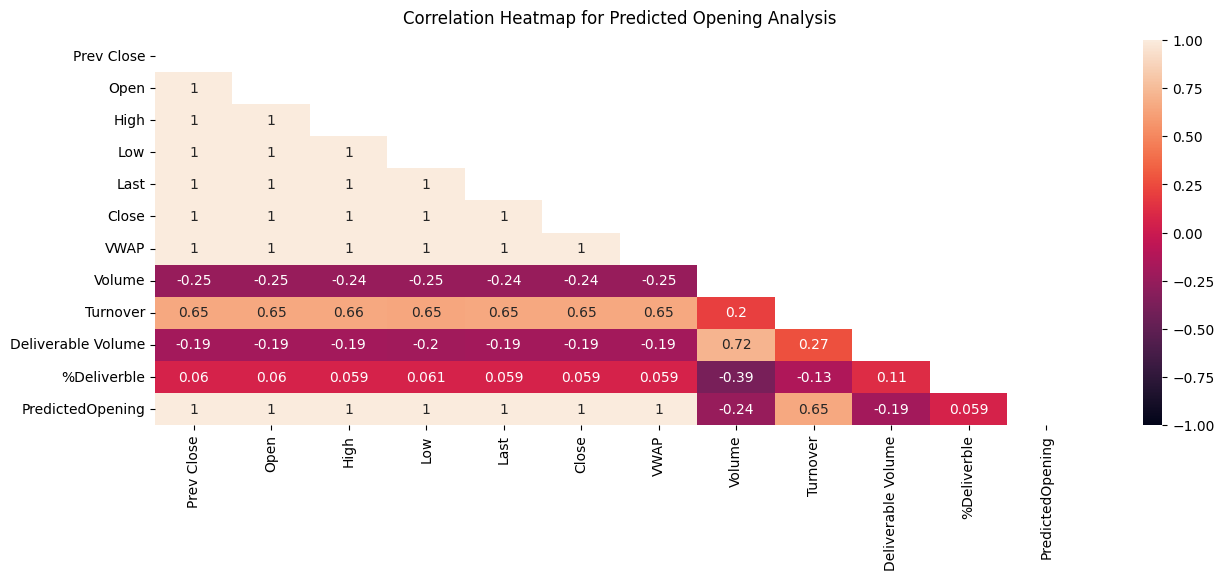

In [150]:
plt.figure(figsize=(15, 5))
mask = np.triu(np.ones_like(prediction_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(correlation_matrix, mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for Predicted Opening Analysis', fontdict={'fontsize':12}, pad=12);
heatmap

#### From the above data we can gather that :

* The values of the previous day's closing, the current day's opening, the present day's high & low and VWAP are highly and positively correlated with the predicted opening of the next day

* The Turnover of the company as observed on any day also has a decent positive correlation with the predicted opening price of the company's share

* The Volume of trade has a marginally negative correlation with the predicted opening of the share

* The Deliverable Volume also has a low negative correlation with with the predicted opening of the share

#### Therefore, we can :

* Drop all the highly & positively correlated columns, except opening and closing, as keeping the rest will be redundant

* We can drop %Deliverables which has almost no correlation with the predicted opening of the share on the next day

* Then let us replot a heatmap for the altered dataset

In [151]:
light_df = prediction_df.drop(["Prev Close","High", "Low", "Last", "%Deliverble"], axis=1)
light_df

,Date,Symbol,Series,Open,Close,VWAP,Volume,Turnover,Deliverable Volume,PredictedOpening
0,2003-07-09,MARUTI,EQ,164.90,164.30,165.95,35164283,5.835528e+14,8537695.0,167.00
1,2003-07-10,MARUTI,EQ,167.00,167.00,166.74,10464179,1.744820e+14,4363947.0,167.75
2,2003-07-11,MARUTI,EQ,167.75,173.35,172.45,11740117,2.024622e+14,3014852.0,174.25
3,2003-07-14,MARUTI,EQ,174.25,177.95,177.91,5982324,1.064313e+14,1949217.0,200.00
4,2003-07-15,MARUTI,EQ,200.00,176.20,176.88,6173689,1.092001e+14,1307694.0,176.45
...,...,...,...,...,...,...,...,...,...,...
4421,2021-04-23,MARUTI,EQ,6560.00,6676.10,6651.34,709306,4.717836e+14,275503.0,6690.20
4422,2021-04-26,MARUTI,EQ,6690.20,6638.90,6678.34,937344,6.259903e+14,464999.0,6669.95
4423,2021-04-27,MARUTI,EQ,6669.95,6568.75,6620.68,1610651,1.066360e+15,588617.0,6568.75
4424,2021-04-28,MARUTI,EQ,6568.75,6573.80,6598.62,1406270,9.279437e+14,672435.0,6635.00


In [152]:
correlation_matrix = light_df.corr()
correlation_matrix

/var/folders/hv/p3_gs49j04g_bqcmh7dv0gp80000gn/T/ipykernel_13529/3360349894.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = light_df.corr()


,Open,Close,VWAP,Volume,Turnover,Deliverable Volume,PredictedOpening
Open,1.000000,0.999709,0.999856,-0.245365,0.649757,-0.194349,0.999653
Close,0.999709,1.000000,0.999953,-0.244921,0.651446,-0.194292,0.999940
VWAP,0.999856,0.999953,1.000000,-0.245027,0.651126,-0.194337,0.999896
Volume,-0.245365,-0.244921,-0.245027,1.000000,0.201375,0.718717,-0.244773
Turnover,0.649757,0.651446,0.651126,0.201375,1.000000,0.270895,0.651443
Deliverable Volume,-0.194349,-0.194292,-0.194337,0.718717,0.270895,1.000000,-0.194225
PredictedOpening,0.999653,0.999940,0.999896,-0.244773,0.651443,-0.194225,1.000000


/var/folders/hv/p3_gs49j04g_bqcmh7dv0gp80000gn/T/ipykernel_13529/2392751558.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(light_df.corr(), dtype=np.bool))
/var/folders/hv/p3_gs49j04g_bqcmh7dv0gp80000gn/T/ipykernel_13529/2392751558.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(light_df.corr(), dtype=np.bool))


<AxesSubplot: title={'center': 'Updated Correlation Heatmap for Predicted Opening Analysis'}>

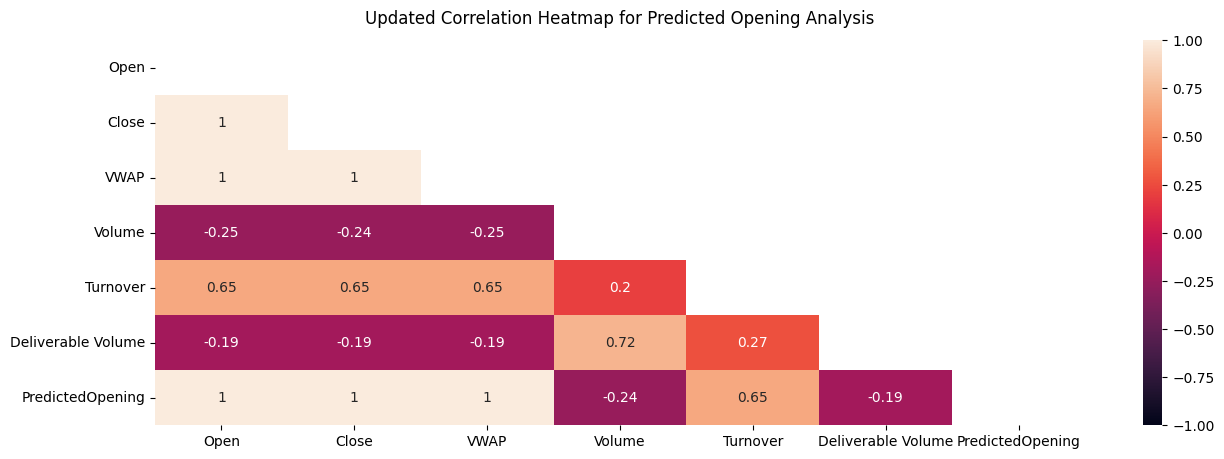

In [153]:
plt.figure(figsize=(15, 5))
mask = np.triu(np.ones_like(light_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(correlation_matrix, mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Updated Correlation Heatmap for Predicted Opening Analysis', fontdict={'fontsize':12}, pad=12);
heatmap

#### Now let us analyse the behaviour of each of these features as against the PredictedOpening, using pair-wise plots :

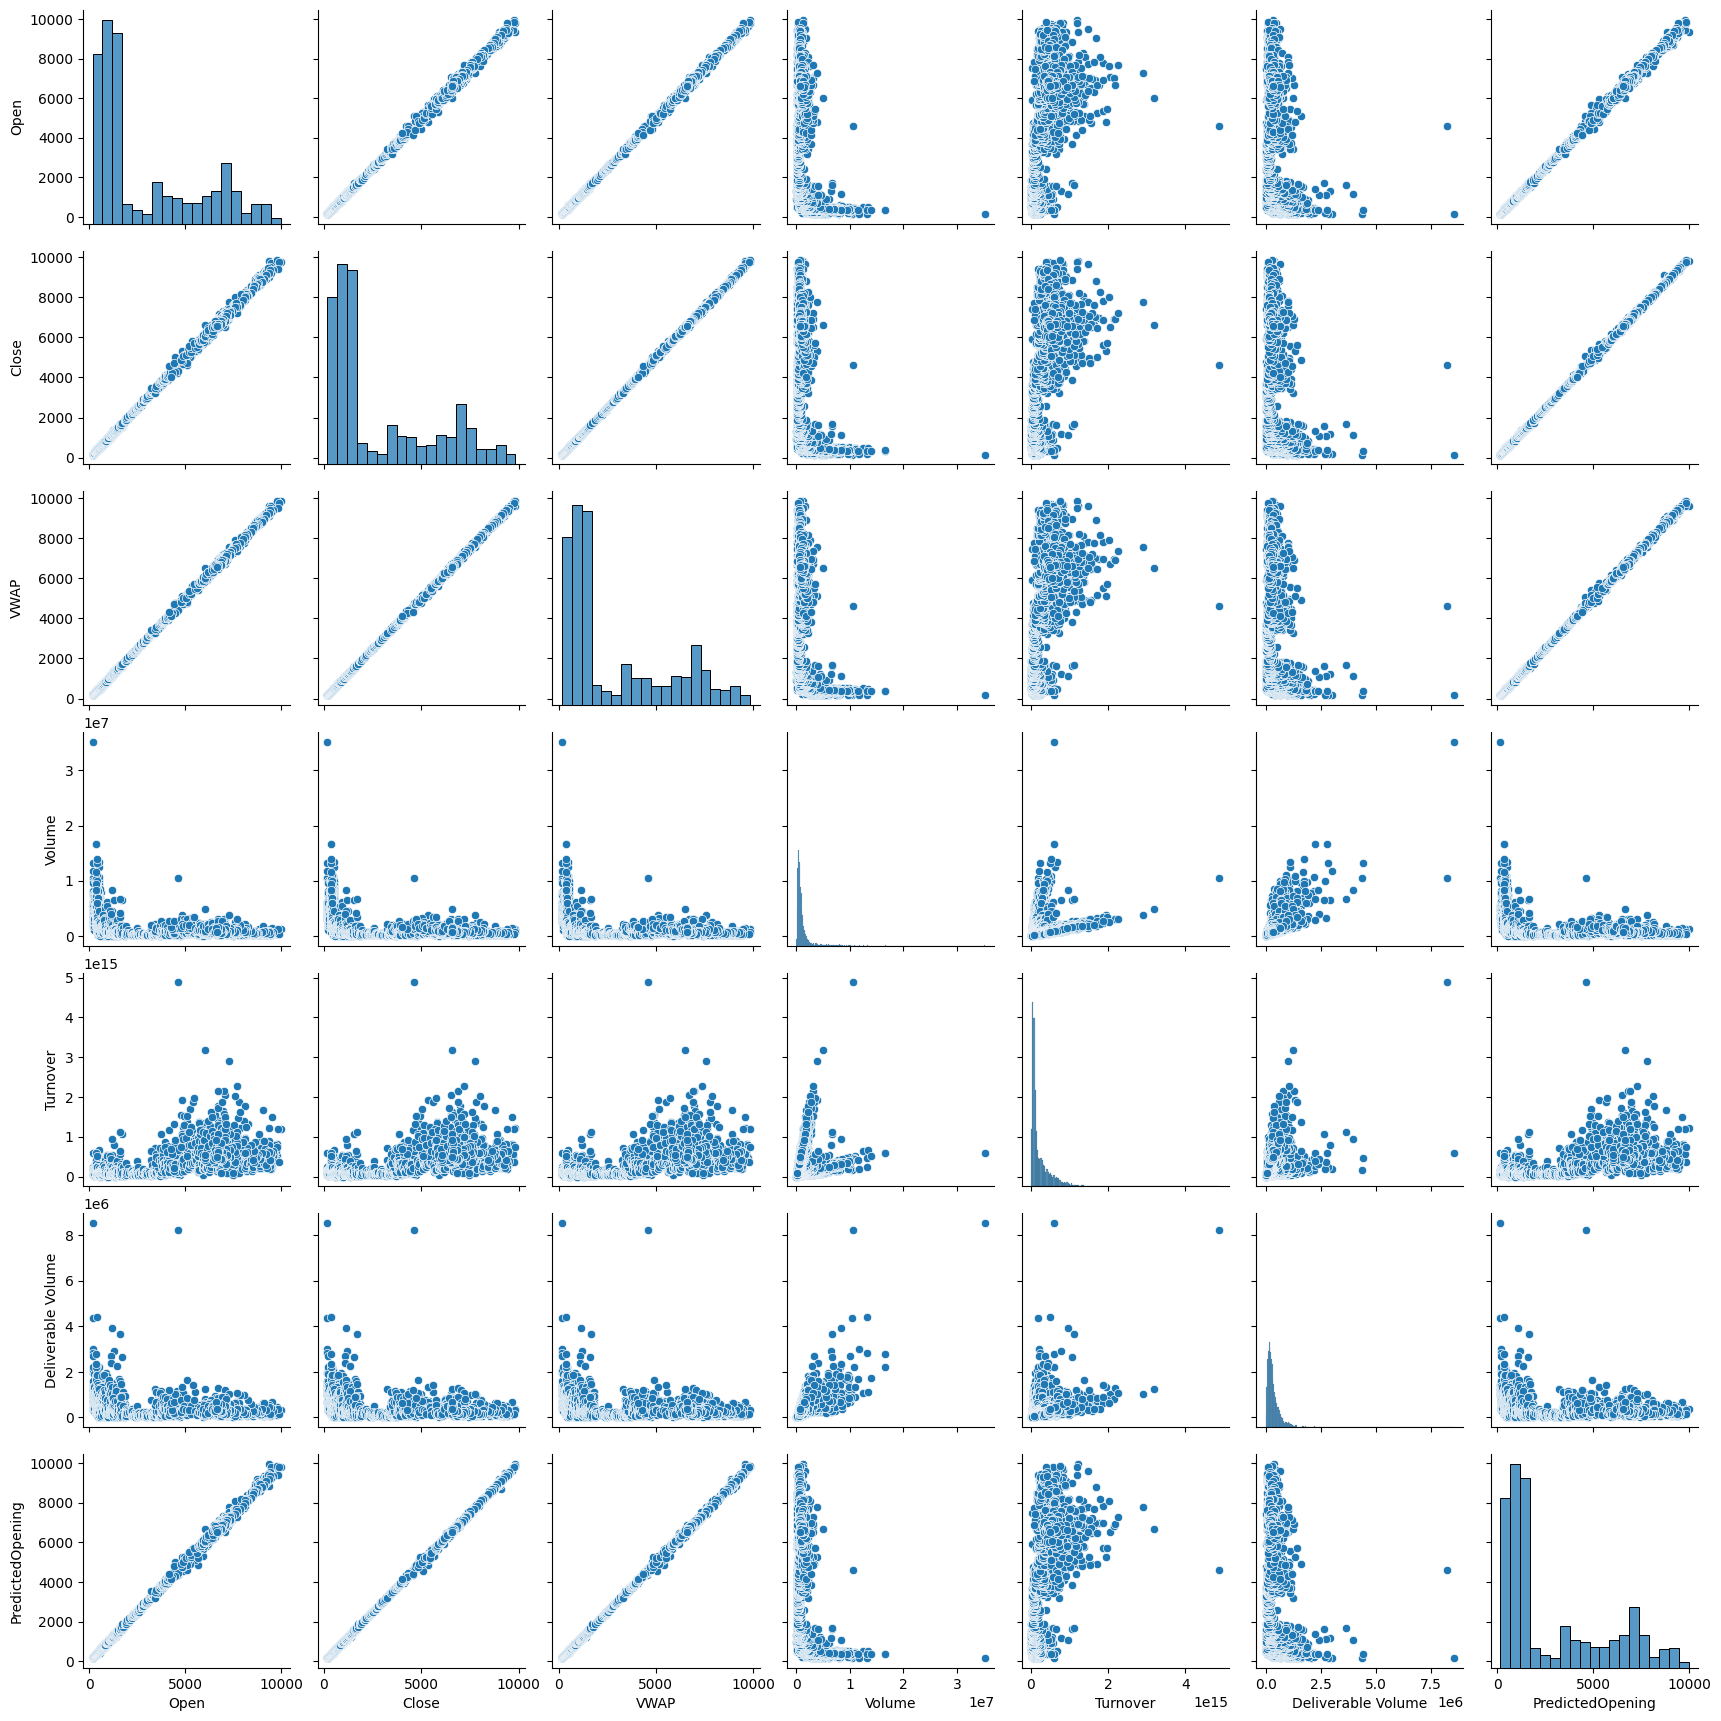

In [154]:
pair_plot = sns.pairplot(light_df)
pair_plot

#### From the above pairwise-plots, we gather that :

* The Opening price, closing price and the VWAP of the share are highly positively correlated and seem to have a linear correlation with the predcited opening price of the next day

* The volume and deliverable volume seem to stagnate the predicted opening, but do affect it at higher values

* The turnover seems to slightly have a positive correlation with the predicted opening

* The distribution of the data across the diagonal, for all columns, as observed in the bar plots seems to be highly right skewed. 

#### Given that our data is not normally distributed, let us see the degree to which the data is skewed and take corrective measures :

In [155]:
light_df.skew()

/var/folders/hv/p3_gs49j04g_bqcmh7dv0gp80000gn/T/ipykernel_13529/2078996933.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  light_df.skew()


Open                  0.918095
Close                 0.915872
VWAP                  0.916604
Volume                5.223602
Turnover              3.291674
Deliverable Volume    7.156802
PredictedOpening      0.917042
dtype: float64

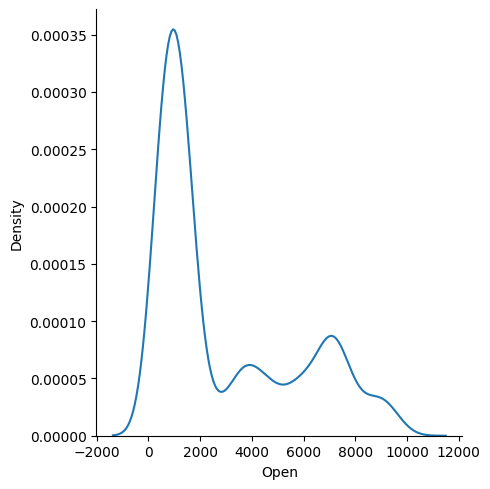

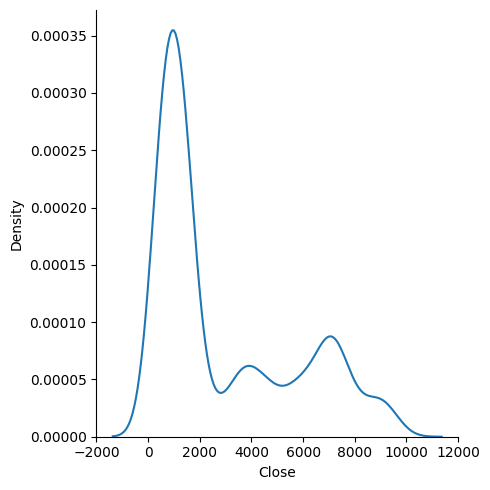

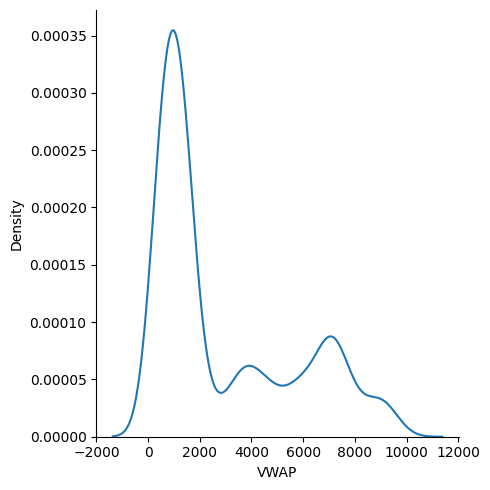

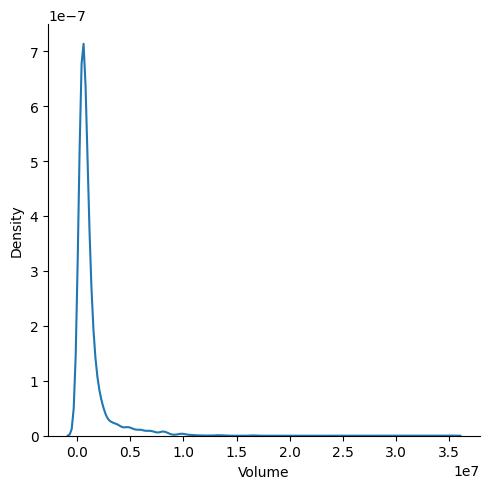

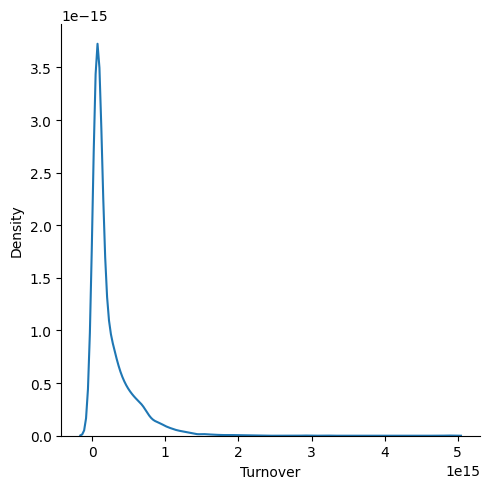

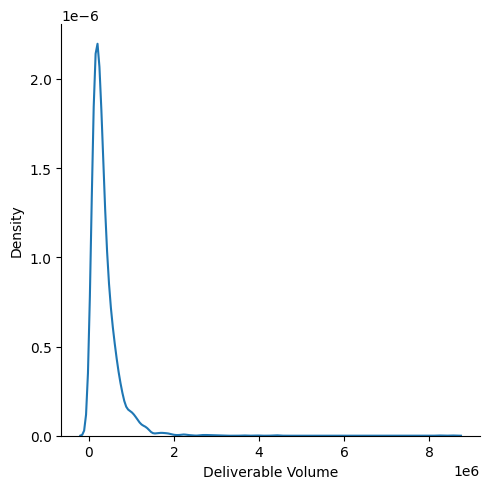

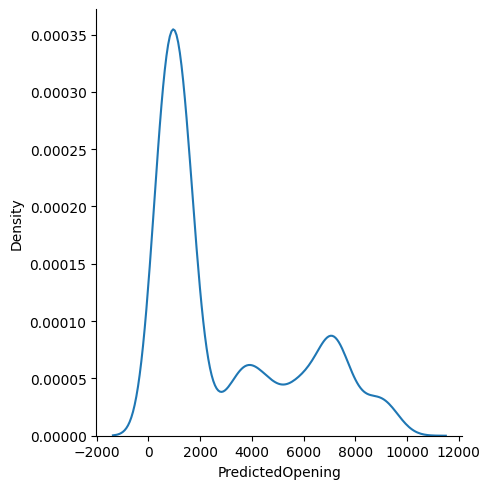

In [156]:
for col in light_df.columns:
    if light_df[col].dtype == "object":
        continue
    sns.displot(light_df[col], kind='kde')

#### We see from the above plots that the distribution of the data is heavily right skewed. To correct this, let us trim the data off the outliers using the following limits :

* Remove all the rows, where the opening price crossed 2200 rupees
* Remove all the rows, where the closing price crossed 2200 rupees
* Remove all the rows, where the VWAP crossed 2200 rupees
* Remove all the rows where the Volume crossed 2e6
* Remove all the rows where the Turnover crossed 1.8e14
* Remove all the rows where the Deliverable Volume crossed 0.8e6
* Remove all the rows where the Predicted Opening crossed 2200
* At the end, split the dataset into the reduced dataframe and a 'check' dataframe to run diagnostics on

In [157]:
reduced_df = light_df
reduced_df = reduced_df[reduced_df["Open"] < 2200]
reduced_df = reduced_df[reduced_df["Close"] < 2200]
reduced_df = reduced_df[reduced_df["VWAP"] < 2200]
reduced_df = reduced_df[reduced_df["Volume"] < (2*math.pow(10,6))]
reduced_df = reduced_df[reduced_df["Turnover"] < (1.8*math.pow(10,14))]
reduced_df = reduced_df[reduced_df["Deliverable Volume"] < (0.8*math.pow(10,6))]
reduced_df = reduced_df[reduced_df["PredictedOpening"] < 2200]
reduced_df = reduced_df[:int(reduced_df.shape[0]*0.80)].reset_index()
check_df = reduced_df[int(reduced_df.shape[0]*0.80):].reset_index()
reduced_df

,index,Date,Symbol,Series,Open,Close,VWAP,Volume,Turnover,Deliverable Volume,PredictedOpening
0,42,2003-09-08,MARUTI,EQ,231.00,228.75,230.58,1817991,4.191875e+13,515970.0,230.0
1,44,2003-09-10,MARUTI,EQ,227.75,227.80,227.91,1476667,3.365463e+13,269036.0,230.0
2,45,2003-09-11,MARUTI,EQ,230.00,225.65,227.66,1092801,2.487859e+13,304907.0,228.0
3,53,2003-09-23,MARUTI,EQ,210.30,213.15,210.92,1766451,3.725736e+13,321780.0,216.0
4,55,2003-09-25,MARUTI,EQ,220.10,213.70,216.23,1916650,4.144400e+13,761539.0,214.4
...,...,...,...,...,...,...,...,...,...,...,...
1667,2232,2012-06-15,MARUTI,EQ,1094.00,1106.80,1092.72,685861,7.494563e+13,247746.0,1115.0
1668,2233,2012-06-18,MARUTI,EQ,1115.00,1091.80,1103.85,610175,6.735400e+13,223214.0,1090.0
1669,2234,2012-06-19,MARUTI,EQ,1090.00,1090.95,1087.84,430252,4.680450e+13,155968.0,1089.0
1670,2235,2012-06-20,MARUTI,EQ,1089.00,1076.40,1080.20,616008,6.654128e+13,309271.0,1080.0


#### Using this trimmed dataset, let us now look at the distributions of the individual columns :

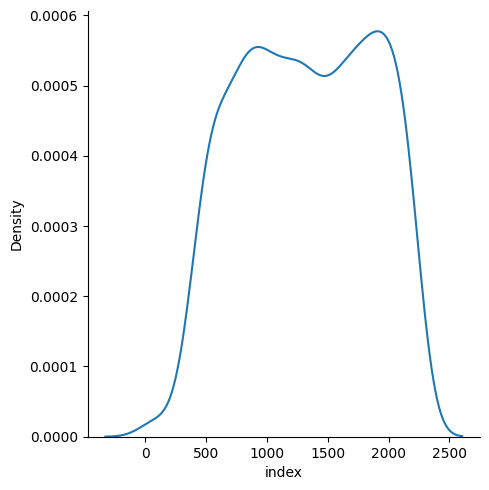

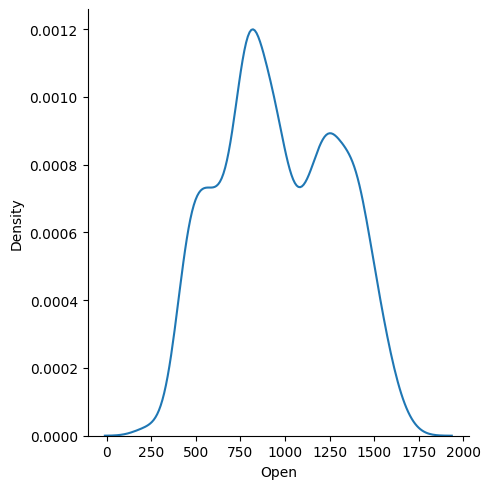

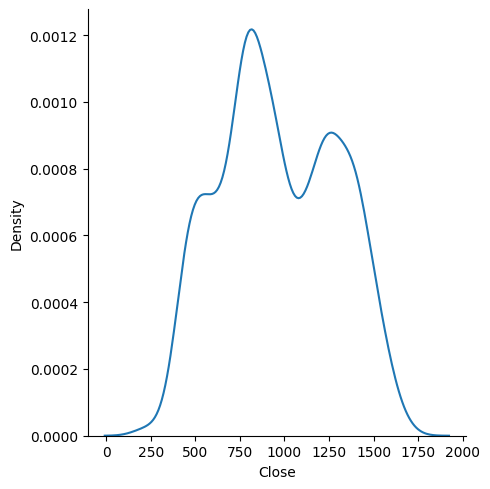

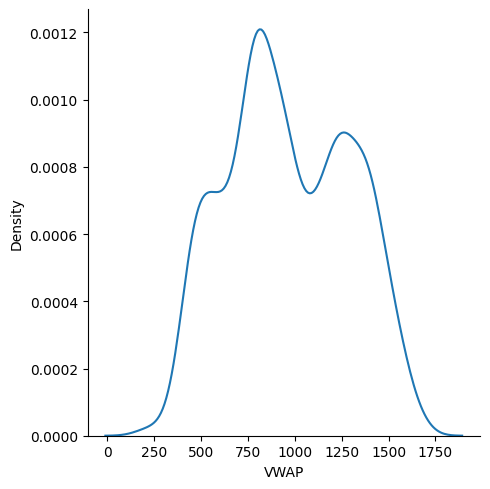

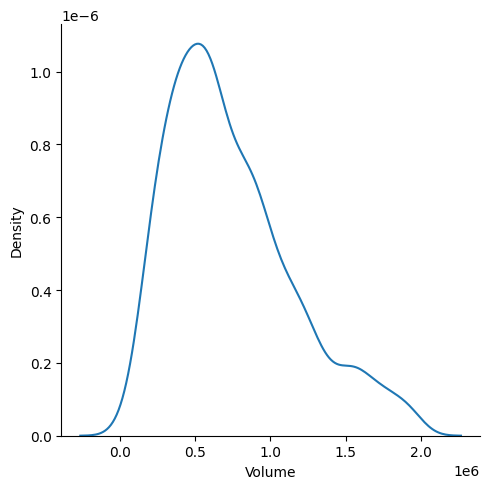

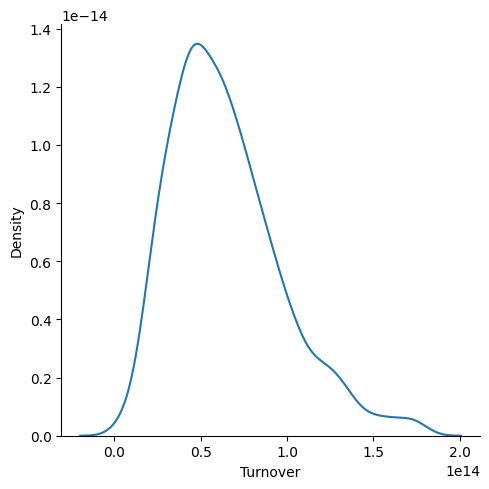

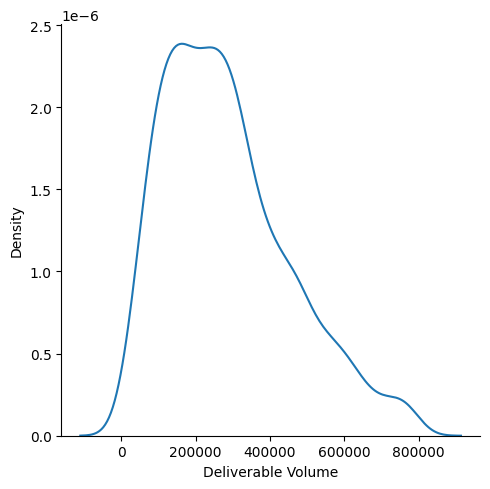

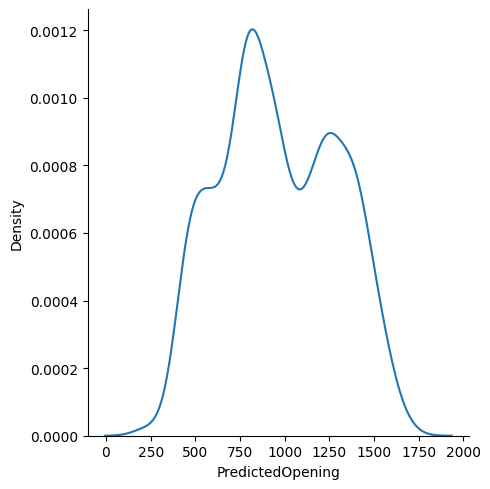

In [158]:
for col in reduced_df.columns:
    if reduced_df[col].dtype == "object":
        continue
    sns.displot(reduced_df[col], kind='kde')

#### We can see from the above images that the distributions seem to follow a far more normal form of distribution than was observed earlier. Now let us plot the updated pairwise plots to see the behaviours :

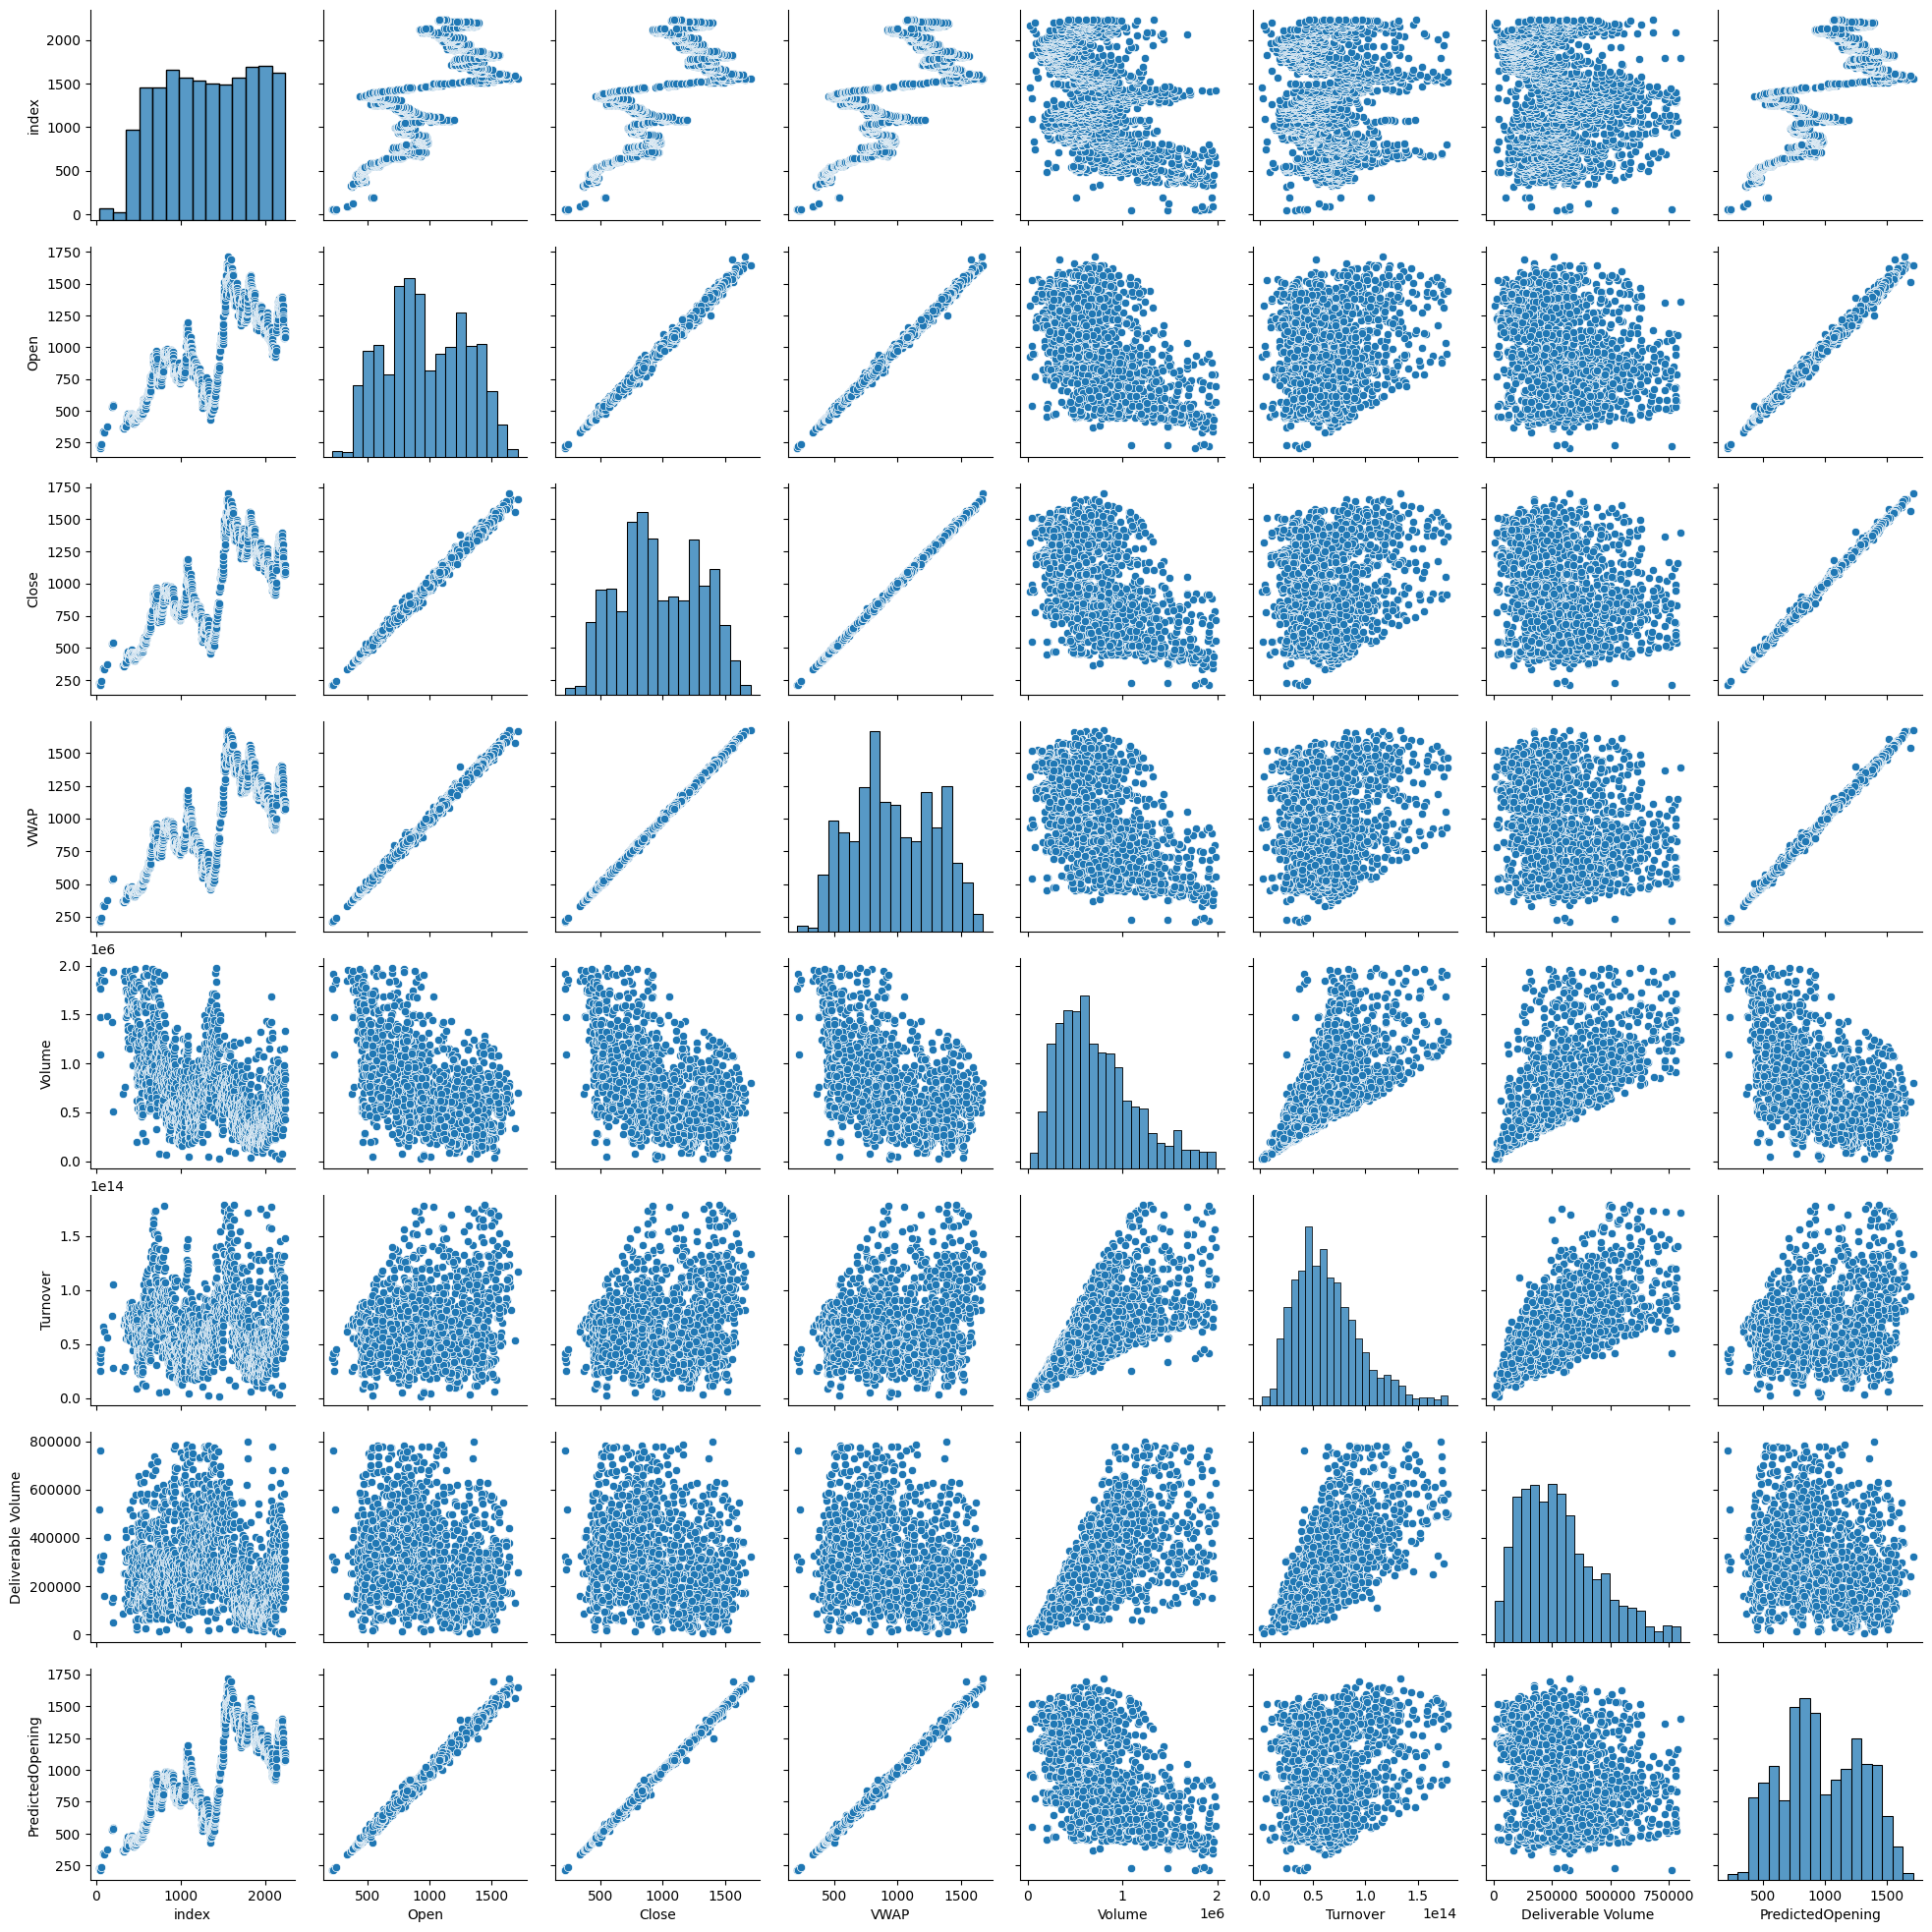

In [159]:
pair_plot = sns.pairplot(reduced_df)
pair_plot

#### We see from the above graphs that the relation between each of the variables and most importantly the predicted opening and the input feature variables is far more clearly visible. Now we can utilize this balanced dataset to perform our Regression analysis and identify which of the features we can use, in order to train our predictive regression model :

In [160]:
reduced_df = reduced_df.sort_values(by='Date',ascending=True)
input_data = reduced_df.loc[:, ~reduced_df.columns.isin(['PredictedOpening', 'Date', 'Symbol', 'Series'])]
output_data = reduced_df.loc[:, reduced_df.columns.isin(['PredictedOpening'])]
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [161]:
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
r2s = r2_score(y_test['PredictedOpening'], predictions)
mse = mean_squared_error(y_test['PredictedOpening'], predictions, squared=False)
print("The R-Squared Score = ",r2s)
print("This roughly translates to an accuracy = ",(r2s*100))
print("The root mean squared error of the predictions = ",mse)

/var/folders/hv/p3_gs49j04g_bqcmh7dv0gp80000gn/T/ipykernel_13529/1536643911.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


The R-Squared Score =  0.9986120160442178
This roughly translates to an accuracy =  99.86120160442178
The root mean squared error of the predictions =  11.911947678884312


#### Checking the trained model against the untrained part of the dataset

In [163]:
input_columns = input_data.columns.to_list()
result_list = []
for index, row in check_df.iterrows():
    current_row = check_df[index:index+1]
    next_row = check_df[index+1:index+2]
    current_input = current_row[input_columns] 
    open_prediction = regr.predict(current_input)
    print("On the date : ",next_row['Date'].values[0])
    print("Predicted opening value : ",open_prediction[0]," Actual opening value : ",next_row['Open'].values[0])
    print()
    result_list.append([next_row['Date'].values[0], open_prediction[0], next_row['Open'].values[0]])

On the date :  2011-02-02
Predicted opening value :  1247.7804999999985  Actual opening value :  1248.45

On the date :  2011-02-03
Predicted opening value :  1214.0240000000001  Actual opening value :  1210.0

On the date :  2011-02-04
Predicted opening value :  1225.8034999999998  Actual opening value :  1230.0

On the date :  2011-02-07
Predicted opening value :  1197.5575  Actual opening value :  1201.0

On the date :  2011-02-08
Predicted opening value :  1195.7795  Actual opening value :  1194.0

On the date :  2011-02-09
Predicted opening value :  1177.6735  Actual opening value :  1174.0

On the date :  2011-02-10
Predicted opening value :  1156.999  Actual opening value :  1157.5

On the date :  2011-02-11
Predicted opening value :  1150.635  Actual opening value :  1145.0

On the date :  2011-02-14
Predicted opening value :  1195.2455  Actual opening value :  1200.0

On the date :  2011-02-15
Predicted opening value :  1222.3059999999991  Actual opening value :  1225.0

On th

On the date :  2011-06-23
Predicted opening value :  1117.689  Actual opening value :  1117.0

On the date :  2011-06-24
Predicted opening value :  1100.1035  Actual opening value :  1104.0

On the date :  2011-06-27
Predicted opening value :  1111.7394999999995  Actual opening value :  1109.9

On the date :  2011-06-28
Predicted opening value :  1164.4909999999988  Actual opening value :  1174.7

On the date :  2011-06-29
Predicted opening value :  1154.954  Actual opening value :  1157.0

On the date :  2011-06-30
Predicted opening value :  1180.4155000000003  Actual opening value :  1185.0

On the date :  2011-07-01
Predicted opening value :  1154.8144999999997  Actual opening value :  1154.0

On the date :  2011-07-04
Predicted opening value :  1146.902  Actual opening value :  1144.0

On the date :  2011-07-05
Predicted opening value :  1155.8300000000013  Actual opening value :  1155.1

On the date :  2011-07-06
Predicted opening value :  1158.4689999999987  Actual opening value 

On the date :  2011-11-21
Predicted opening value :  949.0405000000001  Actual opening value :  939.0

On the date :  2011-11-22
Predicted opening value :  949.531  Actual opening value :  953.0

On the date :  2011-11-23
Predicted opening value :  957.4189999999991  Actual opening value :  954.65

On the date :  2011-11-24
Predicted opening value :  952.8644999999997  Actual opening value :  953.7

On the date :  2011-11-25
Predicted opening value :  989.7375000000006  Actual opening value :  992.0

On the date :  2011-11-28
Predicted opening value :  952.0834999999997  Actual opening value :  966.95

On the date :  2011-11-29
Predicted opening value :  966.2094999999991  Actual opening value :  965.9

On the date :  2011-11-30
Predicted opening value :  957.6324999999988  Actual opening value :  956.95

On the date :  2011-12-01
Predicted opening value :  977.4945  Actual opening value :  992.0

On the date :  2011-12-02
Predicted opening value :  961.2039999999995  Actual opening va

On the date :  2012-04-25
Predicted opening value :  1365.7845000000016  Actual opening value :  1362.1

On the date :  2012-04-26
Predicted opening value :  1381.5595  Actual opening value :  1380.0

On the date :  2012-04-27
Predicted opening value :  1383.804000000001  Actual opening value :  1381.05

On the date :  2012-04-28
Predicted opening value :  1383.3675  Actual opening value :  1385.0

On the date :  2012-04-30
Predicted opening value :  1401.6740000000002  Actual opening value :  1399.0

On the date :  2012-05-02
Predicted opening value :  1377.5295  Actual opening value :  1384.5

On the date :  2012-05-03
Predicted opening value :  1329.4125000000015  Actual opening value :  1329.8

On the date :  2012-05-04
Predicted opening value :  1288.4700000000014  Actual opening value :  1287.3

On the date :  2012-05-07
Predicted opening value :  1272.2384999999988  Actual opening value :  1264.95

On the date :  2012-05-08
Predicted opening value :  1318.481  Actual opening val

IndexError: index 0 is out of bounds for axis 0 with size 0

In [164]:
result_list
diagnostic_df = pd.DataFrame(result_list, columns =['Date', 'Prediction', 'Actual'])
diagnostic_df

,Date,Prediction,Actual
0,2011-02-02,1247.7805,1248.45
1,2011-02-03,1214.0240,1210.00
2,2011-02-04,1225.8035,1230.00
3,2011-02-07,1197.5575,1201.00
4,2011-02-08,1195.7795,1194.00
...,...,...,...
329,2012-06-15,1089.3780,1094.00
330,2012-06-18,1106.4115,1115.00
331,2012-06-19,1092.2145,1090.00
332,2012-06-20,1089.5495,1089.00


#### Plotting the graphs of the predicted opening price vs the actual opening price on a given day

<AxesSubplot: xlabel='Date', ylabel='Prediction'>

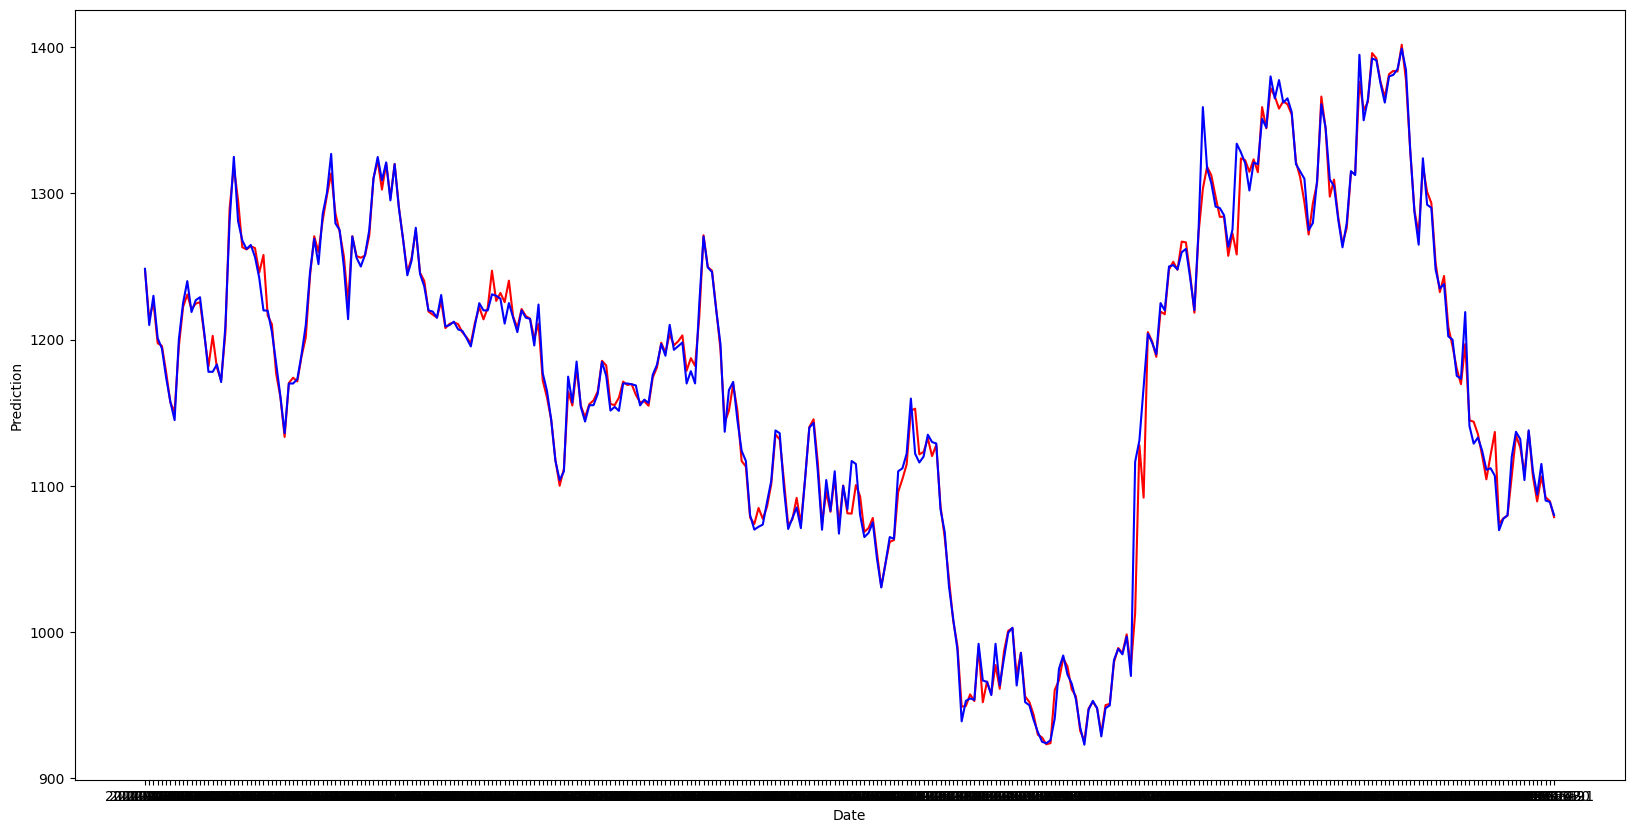

In [165]:
plt.figure(figsize=(20,10))
sns.lineplot(data=diagnostic_df, x='Date', y='Prediction', color = "red")
sns.lineplot(data=diagnostic_df, x='Date', y='Actual', color = "blue")

#### For the first model, we get the percentage errors :

In [135]:
diagnostic_df['ObservedError'] = (diagnostic_df['Prediction'] - diagnostic_df['Actual'])
diagnostic_df['PercentageError'] = (diagnostic_df['ObservedError'] * 100) / diagnostic_df['Actual']
diagnostic_df

,Date,Prediction,Actual,ObservedError,PercentageError
0,2011-02-02,1247.7805,1248.45,-0.6695,-0.053626
1,2011-02-03,1214.0240,1210.00,4.0240,0.332562
2,2011-02-04,1225.8035,1230.00,-4.1965,-0.341179
3,2011-02-07,1197.5575,1201.00,-3.4425,-0.286636
4,2011-02-08,1195.7795,1194.00,1.7795,0.149037
...,...,...,...,...,...
329,2012-06-15,1089.3780,1094.00,-4.6220,-0.422486
330,2012-06-18,1106.4115,1115.00,-8.5885,-0.770269
331,2012-06-19,1092.2145,1090.00,2.2145,0.203165
332,2012-06-20,1089.5495,1089.00,0.5495,0.050459


In [136]:
greatest_error_percent = diagnostic_df['PercentageError'].abs().max()
smallest_error_percent = diagnostic_df['PercentageError'].abs().min()
average_error_percent = diagnostic_df['PercentageError'].abs().mean()
print("Largest error% observed : ",greatest_error_percent)
print("Smallest error% observed : ",smallest_error_percent)
print("Average error observed : ",average_error_percent)

Largest error% observed :  9.271204657411547
Smallest error% observed :  0.0013713080168811869
Average error observed :  0.4549117693631712


#### In summary, the first model :

* Has an average observed error %age, between the actual and the predicted opening price of : 0.45%
* Has a maximum observed error %age : 9.2712%
* Has a maximum observed error %age : 0.00137%

#### The above indicates an exceptional model which has an R2 score of 0.9986. Let us now test this model on that part of the dataset on which the model has not been trained :

#### The above results indicate that out model has failed for the dataset which consists of all the data, including the outliers. So we, can now attempt to train a second model on the data which we removed in our reduced dataset :

In [196]:
reduced_df = light_df
reduced_df = reduced_df[reduced_df["Open"] > 2200]
reduced_df = reduced_df[reduced_df["Close"] > 2200]
reduced_df = reduced_df[reduced_df["VWAP"] > 2200]
reduced_df = reduced_df[reduced_df["Turnover"] > (1.8*math.pow(10,14))]
reduced_df = reduced_df[reduced_df["PredictedOpening"] > 2200]
reduced_df = reduced_df[:int(reduced_df.shape[0]*0.80)].reset_index()
check_df = reduced_df[int(reduced_df.shape[0]*0.80):].reset_index()
reduced_df

,index,Date,Symbol,Series,Open,Close,VWAP,Volume,Turnover,Deliverable Volume,PredictedOpening
0,2714,2014-05-26,MARUTI,EQ,2407.50,2341.30,2431.79,778712,1.893663e+14,278205.0,2345.95
1,2740,2014-07-01,MARUTI,EQ,2453.80,2583.80,2552.18,1505073,3.841210e+14,503772.0,2593.80
2,2741,2014-07-02,MARUTI,EQ,2593.80,2641.95,2628.60,775548,2.038604e+14,165604.0,2650.00
3,2761,2014-07-31,MARUTI,EQ,2564.75,2524.05,2551.36,958095,2.444443e+14,253837.0,2510.00
4,2762,2014-08-01,MARUTI,EQ,2510.00,2586.00,2592.77,943610,2.446566e+14,209470.0,2590.00
...,...,...,...,...,...,...,...,...,...,...,...
1071,4151,2020-03-20,MARUTI,EQ,4869.00,5079.20,5040.51,1614608,8.138443e+14,664312.0,4575.00
1072,4152,2020-03-23,MARUTI,EQ,4575.00,4220.35,4371.69,1531989,6.697383e+14,934064.0,4341.00
1073,4153,2020-03-24,MARUTI,EQ,4341.00,4486.45,4361.25,1746713,7.617860e+14,814032.0,4439.00
1074,4154,2020-03-25,MARUTI,EQ,4439.00,5005.95,4785.80,1728820,8.273787e+14,691280.0,5024.45


In [197]:
input_data = new_reduced.loc[:, ~new_reduced.columns.isin(['PredictedOpening', 'Date', 'Symbol', 'Series'])]
output_data = new_reduced.loc[:, new_reduced.columns.isin(['PredictedOpening'])]
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [198]:
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
r2s = r2_score(y_test['PredictedOpening'], predictions)
mse = mean_squared_error(y_test, predictions, squared=False)
print("The R-Squared Score = ",r2s)
print("This roughly translates to an accuracy = ",(r2s*100))
print("The root mean squared error of the predictions = ",mse)

/var/folders/hv/p3_gs49j04g_bqcmh7dv0gp80000gn/T/ipykernel_13529/2530583177.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


The R-Squared Score =  0.9998689480380992
This roughly translates to an accuracy =  99.98689480380992
The root mean squared error of the predictions =  19.96155120534619


In [199]:
input_columns = input_data.columns.to_list()
result_list = []
for index, row in check_df.iterrows():
    current_row = check_df[index:index+1]
    next_row = check_df[index+1:index+2]
    current_input = current_row[input_columns] 
    open_prediction = regr.predict(current_input)
    print("On the date : ",next_row['Date'].values[0])
    print("Predicted opening value : ",open_prediction[0]," Actual opening value : ",next_row['Open'].values[0])
    print()
    result_list.append([next_row['Date'].values[0], open_prediction[0], next_row['Open'].values[0]])

On the date :  2019-05-15
Predicted opening value :  6765.8665  Actual opening value :  6590.0

On the date :  2019-05-16
Predicted opening value :  6751.9595  Actual opening value :  6506.0

On the date :  2019-05-17
Predicted opening value :  6708.5065  Actual opening value :  6497.0

On the date :  2019-05-20
Predicted opening value :  6807.407000000001  Actual opening value :  6875.0

On the date :  2019-05-21
Predicted opening value :  7099.709000000002  Actual opening value :  7105.0

On the date :  2019-05-22
Predicted opening value :  7077.910500000003  Actual opening value :  6877.2

On the date :  2019-05-23
Predicted opening value :  7016.399  Actual opening value :  6996.0

On the date :  2019-05-24
Predicted opening value :  7052.3690000000015  Actual opening value :  6964.95

On the date :  2019-05-27
Predicted opening value :  7125.912500000001  Actual opening value :  7095.0

On the date :  2019-05-28
Predicted opening value :  7171.304500000002  Actual opening value : 

On the date :  2019-09-20
Predicted opening value :  6279.680500000005  Actual opening value :  6015.0

On the date :  2019-09-23
Predicted opening value :  6719.467000000001  Actual opening value :  6676.1

On the date :  2019-09-24
Predicted opening value :  6999.504  Actual opening value :  6935.0

On the date :  2019-09-25
Predicted opening value :  7049.660000000001  Actual opening value :  7000.0

On the date :  2019-09-26
Predicted opening value :  6924.489000000002  Actual opening value :  6700.0

On the date :  2019-09-27
Predicted opening value :  6982.639  Actual opening value :  6860.0

On the date :  2019-09-30
Predicted opening value :  6951.033999999998  Actual opening value :  6773.0

On the date :  2019-10-01
Predicted opening value :  6902.014500000004  Actual opening value :  6720.0

On the date :  2019-10-03
Predicted opening value :  6933.9635  Actual opening value :  6786.6

On the date :  2019-10-04
Predicted opening value :  6916.999000000003  Actual opening val

On the date :  2020-02-13
Predicted opening value :  7138.933000000001  Actual opening value :  7050.0

On the date :  2020-02-14
Predicted opening value :  7075.341500000001  Actual opening value :  7000.05

On the date :  2020-02-17
Predicted opening value :  7058.914999999999  Actual opening value :  6920.0

On the date :  2020-02-18
Predicted opening value :  7005.8125  Actual opening value :  6925.0

On the date :  2020-02-19
Predicted opening value :  6952.3279999999995  Actual opening value :  6850.0

On the date :  2020-02-20
Predicted opening value :  6922.071500000002  Actual opening value :  6761.0

On the date :  2020-02-24
Predicted opening value :  6942.397500000001  Actual opening value :  6710.0

On the date :  2020-02-25
Predicted opening value :  6747.091000000001  Actual opening value :  6505.4

On the date :  2020-02-26
Predicted opening value :  6616.395  Actual opening value :  6350.0

On the date :  2020-02-27
Predicted opening value :  6495.142000000002  Actual 

IndexError: index 0 is out of bounds for axis 0 with size 0

In [200]:
result_list
diagnostic_df = pd.DataFrame(result_list, columns =['Date', 'Prediction', 'Actual'])
diagnostic_df

,Date,Prediction,Actual
0,2019-05-15,6765.8665,6590.00
1,2019-05-16,6751.9595,6506.00
2,2019-05-17,6708.5065,6497.00
3,2019-05-20,6807.4070,6875.00
4,2019-05-21,7099.7090,7105.00
...,...,...,...
210,2020-03-20,4862.6600,4869.00
211,2020-03-23,5064.4165,4575.00
212,2020-03-24,4283.6185,4341.00
213,2020-03-25,4487.8465,4439.00


<AxesSubplot: xlabel='Date', ylabel='Prediction'>

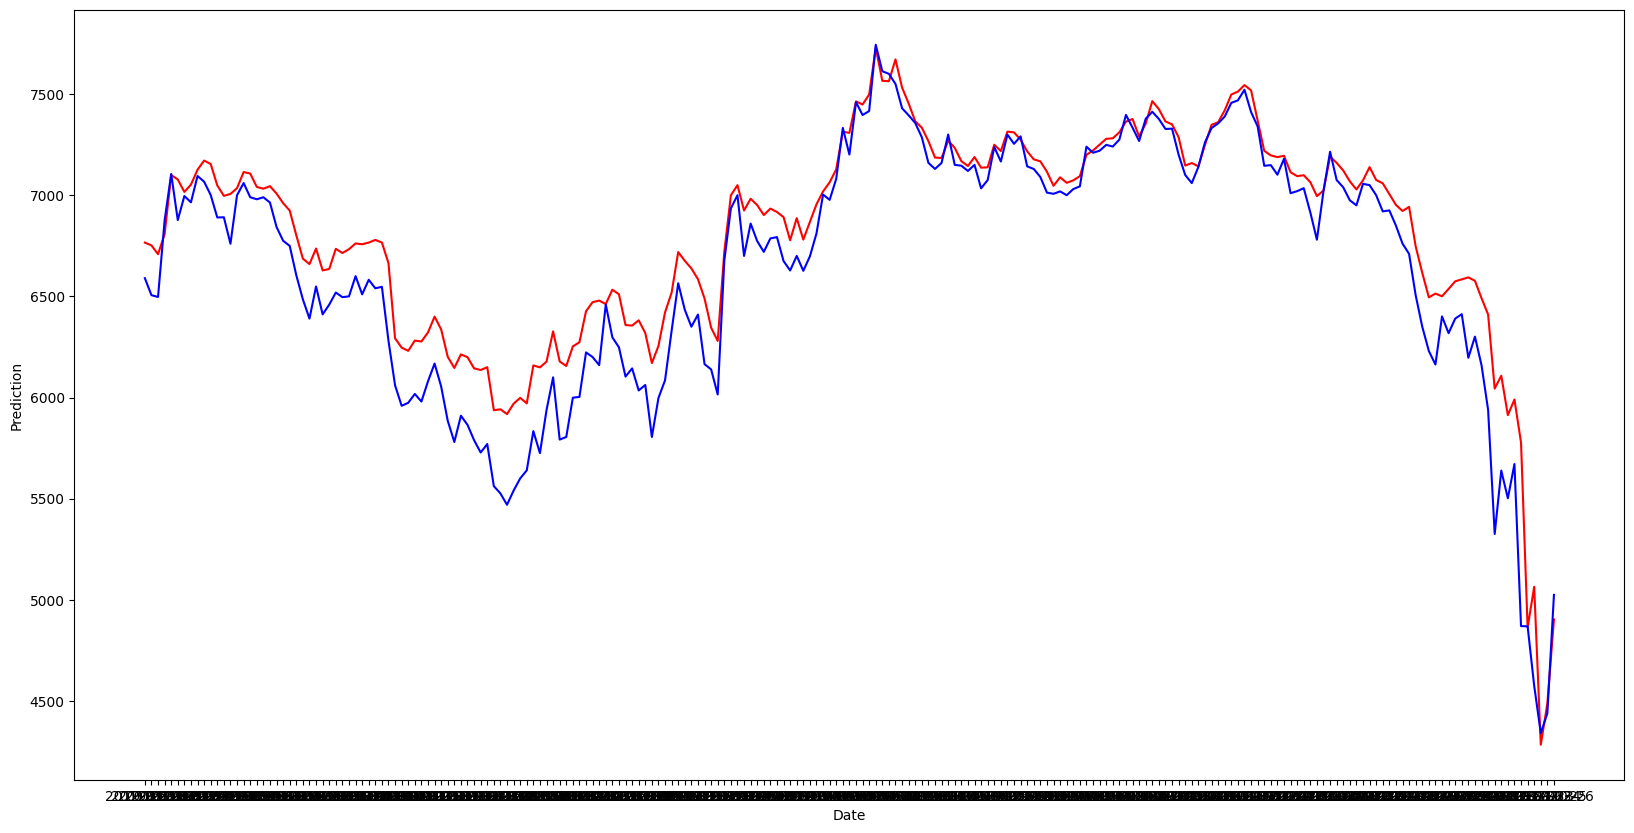

In [201]:
plt.figure(figsize=(20,10))
sns.lineplot(data=diagnostic_df, x='Date', y='Prediction', color = "red")
sns.lineplot(data=diagnostic_df, x='Date', y='Actual', color = "blue")

In [202]:
diagnostic_df['ObservedError'] = (diagnostic_df['Prediction'] - diagnostic_df['Actual'])
diagnostic_df['PercentageError'] = (diagnostic_df['ObservedError'] * 100) / diagnostic_df['Actual']
diagnostic_df

,Date,Prediction,Actual,ObservedError,PercentageError
0,2019-05-15,6765.8665,6590.00,175.8665,2.668687
1,2019-05-16,6751.9595,6506.00,245.9595,3.780503
2,2019-05-17,6708.5065,6497.00,211.5065,3.255449
3,2019-05-20,6807.4070,6875.00,-67.5930,-0.983171
4,2019-05-21,7099.7090,7105.00,-5.2910,-0.074469
...,...,...,...,...,...
210,2020-03-20,4862.6600,4869.00,-6.3400,-0.130212
211,2020-03-23,5064.4165,4575.00,489.4165,10.697628
212,2020-03-24,4283.6185,4341.00,-57.3815,-1.321850
213,2020-03-25,4487.8465,4439.00,48.8465,1.100394
